In [56]:
import hashlib
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
from skimage import metrics

In [57]:
filename = 'data.txt' 

with open (filename,"rb") as f:
    data = f.read()
    hash_msg = hashlib.sha256(data).hexdigest()
    print("the hash message is: " + hash_msg)
    # print(bytes)

the hash message is: 4b25aa5767011363e4e94cccc28c089cd112bcad043df650225e194fd8d879d5


In [58]:
msg = bin(int(hash_msg,16)).replace("0b","")
print(msg)

100101100100101101010100101011101100111000000010001001101100011111001001110100101001100110011001100001010001100000010001001110011010001000100101011110010101101000001000011110111110110010100000010001001011110000110010100111111011000110110000111100111010101


In [59]:
img =  cv2.imread('Lenna.png',0)
img_flat1 = img.flatten()
img_flat2=img.flatten()
# print(real_img)
# print(img_flat)

In [60]:
#encryption
for i in range(len(msg)):
    img_flat1[i]=img_flat1[i] & 254
    if int(msg[i])==1:
        img_flat1[i]=img_flat1[i] | 1

stego_img = np.zeros((img.shape[0],img.shape[1]),np.uint8)
stego_img = np.reshape(img_flat1,(img.shape[0],img.shape[1]))

In [61]:
#decryption
dec_msg=""
for  i in range(len(msg)):
    dec_msg = dec_msg + str(img_flat1[i] & 1)

print("The hash message is: "+ hash_msg)
dec_msg = int(dec_msg, 2)
dec_msg = hex(dec_msg)[2:]
print("The decrypted message is: ",hex_msg)

# diff = int(msg,2) - int(dec_msg,2)
diff = int(hash_msg,16) - int(dec_msg,16)
print ("Difference between encrypted and decrypted message  is : ",diff)

The hash message is: 4b25aa5767011363e4e94cccc28c089cd112bcad043df650225e194fd8d879d5
The decrypted message is:  4b25aa5767011363e4e94cccc28c089cd112bcad043df650225e194fd8d879d5
Difference between encrypted and decrypted message  is :  0


MSE: 0.000415802001953125
PSNR: 81.94193784878948
SSIM:  0.9999991446709846


Text(0.5, 1.0, 'Stego Image')

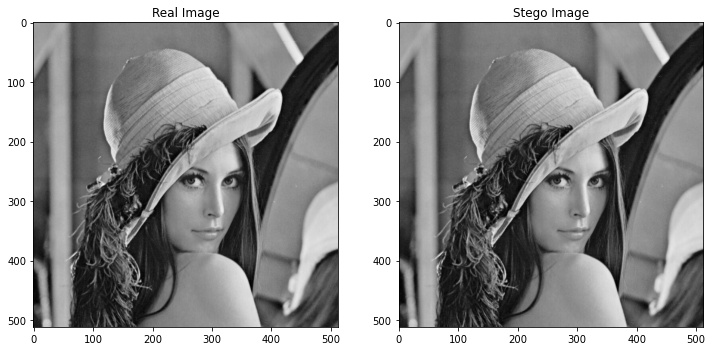

In [62]:
#steganalysis
mse=0

for i in range(img.shape[0]*img.shape[1]):
    mse += (img_flat2[i]-img_flat1[i])*(img_flat2[i]-img_flat1[i])
mse/=(img.shape[0]*img.shape[1])
print("MSE:",mse)
psnr = 20* math.log10(255/math.sqrt(mse))
print("PSNR:", psnr)
print("SSIM: ",metrics.structural_similarity(img,stego_img))

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.imshow(img,'gray')
plt.title("Real Image")
plt.subplot(1,2,2)
plt.imshow(stego_img,'gray')
plt.title("Stego Image")